In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import wrangle

In [2]:
df = wrangle.get_explore_data()
df = wrangle.prep_data(df, features = wrangle.features)
df = wrangle.rename_data(df)
df.shape

(375734, 20)

In [3]:
train, validate, test = wrangle.split_data(df)
df = train.copy()
df.shape

(244226, 20)

## What i want to do: create data frames for each binned region and each binned elevation and each season. 
## Three features binned like
- elevation = 4
- region = 3
- season = we'll see

### steps to take 
1. pull in elevation dfs incase they are better than those created in step 2
2. use the computer to generate four bins for elevation
3. use a stat test to see which group is a better indicator for mean_temp
4. look at startdate min and max and see how many seasons those dates cover
5. create bins based on those seasons
6. take in Rae's bins for region
7. model off of the bins in various combinations
8. model off of a single narrow bin and all other contest features

# 1. elevation bins

In [4]:
# these are the four naomi-made dataframes
elevation_low_low=df[df.elevation < 500.0]
elevation_low=df[(df.elevation > 500.0)&(df.elevation <1000)]
elevation_mid = df[(df.elevation >1000.0) & (df.elevation < 2000.0)]
elevation_high = df[df.elevation > 2000.0]

In [5]:
# this is the train dataframe with a new column that labels the elevation based on bin labels
labels = ['low-low', 'low', 'mid', 'high']
bins = [ 0, 500, 1000, 2000, 4000]

df['elevation_bins'] = pd.cut(df['elevation'] , bins=bins, labels=labels, include_lowest=True)

# 2. program generated bins

In [6]:
labels = ['bottom_quan', 'low_quan', 'mid_quan', 'high_quan']
df['elevation_quantile'] =  pd.qcut(df['elevation'], 4, labels=labels)

# 3. stat test for significance

In [7]:
# ask mark for help

# 4. how many seasons?


In [8]:
df.startdate.max()

Timestamp('2016-08-31 00:00:00')

In [9]:
df.startdate.min()

Timestamp('2014-09-01 00:00:00')

## dates are suspicious. Ask team to check original df and train df to see if data matches

Counting September as an Autumn Month the break down is as such:
- 2014 Sep-Nov = 1
- 2014 Dec-2015 Feb = 2
- 2015 Mar-May = 3
- 2015 Jun-Aug = 4
- 2015 Sep-Nov = 5
- 2015 Dec-2016 Feb = 6
- 2016 Mar-May = 7
- 2016 Jun-Aug = 8
*** eight seasons, two full years, two of each season




# 5. creating bins based on seasons
### do i want eight bins, one for each season? or four bins each with two seasons?


In [10]:
# four bins of seasons with two three month periods each
labels = ['Autumn', 'Winter', 'Spring', 'Summer']
df['Season_quantile'] =  pd.qcut(df['startdate'], 4, labels=labels)

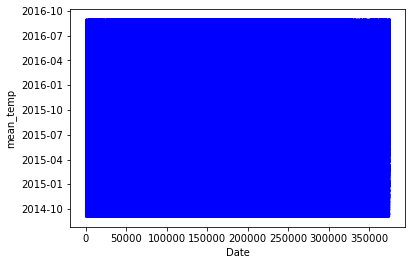

In [11]:
# reset index

# Plot the time series in your DataFrame
ax = df.startdate.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('mean_temp');